In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os.path
# Uncomment the next line for use in a Jupyter notebook
%matplotlib inline

In [2]:
class MarkerBlob:
    def __init__(self, size, pt, dist_from_center=0, slope=0, norm_size=1, angle_from_prev=0):
        self.size = size
        self.pt = pt
        self.norm_size = norm_size
        self.dist_from_center = dist_from_center
        self.slope = slope
        self.angle_from_prev = angle_from_prev

    def __str__(self):
        s = "\nSize = " + str(self.size) + ", "
        s += "Point = " + str(self.pt) + ", "
        s += "Norm Size = " + str(self.norm_size) + ", "
        s += "Distance from Center = " + str(self.dist_from_center) + ", "
        s += "Slope = " + str(self.slope) + ", "
        s += "Angle From Previous Blob = " + str(self.angle_from_prev)
        return s

class MarkerBlobConfig:
    def __init__(self, center=None, center_image_kp=None) :
        self.center = center
        self.center_image_kp = center_image_kp
        self.outers = []
        self.rejects = []
        self.id = None
        
    def addOuter(self, o):
        self.outers.append(o)
        
    def addReject(self, r):
        self.rejects.append(r)
        
    def __str__(self):
        s = 'ID = ' + str(self.id) + ', '
        s += str(self.center) + ', '
        s += str(self.center_image_kp) + ', '
        s += '\nOuters = ' 
        for o in self.outers:
            s += ' ' + str(o)
        s += '\nRejects = ' 
        for o in self.rejects:
            s += ' ' + str(o)
        return s

class ImageMarkerConfig:
    def __init__(self, image_name, image):
        self.image_name = image_name
        self.image = image
        self.markerBlobs = []
        self.centerkp = []
        self.image_centerkp = []
        self.kplist = {}
    
    def addBlob(self, markerBlob):
        self.markerBlobs.append(markerBlob)

In [3]:
image_folder = '/media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images'
images_name = ['thecolumn_2017-08-11_01_DJI_0121.JPG', 
               'thecolumn_2017-08-11_01_DJI_0053.JPG', 
               'thecolumn_2017-08-11_01_DJI_0054.JPG',
                'thecolumn_2017-08-11_01_DJI_0104.JPG',
              'thecolumn_2017-08-11_01_DJI_0191.JPG',
              'thecolumn_2017-08-11_01_DJI_0192.JPG']
#image_name = '/media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images/DJI_0433.JPG'
images = []
for nm in images_name:
    print('reading file ' + os.path.join(image_folder, nm))
    images.append(ImageMarkerConfig(nm, mpimg.imread(os.path.join(image_folder, nm))))

reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images/thecolumn_2017-08-11_01_DJI_0121.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images/thecolumn_2017-08-11_01_DJI_0053.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images/thecolumn_2017-08-11_01_DJI_0054.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images/thecolumn_2017-08-11_01_DJI_0104.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images/thecolumn_2017-08-11_01_DJI_0191.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images/thecolumn_2017-08-11_01_DJI_0192.JPG


In [4]:
# image_folder = '/media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images'
# images_name = []

# for f in os.listdir(image_folder):
#     if f.endswith('.jpg') or f.endswith('.JPG'):
#         images_name.append(f)
        
# images = []
# for nm in images_name:
#     print('reading file ' + os.path.join(image_folder, nm))
#     images.append(ImageMarkerConfig(nm, mpimg.imread(os.path.join(image_folder, nm))))


In [5]:
# image_folder = '/media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images'
# images_name = ['DJI_0059.JPG', 
#                'DJI_0060.JPG', 
#                'DJI_0061.JPG',
#                'DJI_0062.JPG',
#                'DJI_0160.JPG', 
#                'DJI_0161.JPG',
#                'DJI_0162.JPG']
# #image_name = '/media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images/DJI_0433.JPG'
# images = []
# for nm in images_name:
#     print('reading file ' + os.path.join(image_folder, nm))
#     images.append(ImageMarkerConfig(nm, mpimg.imread(os.path.join(image_folder, nm))))

In [6]:
# image_folder = '/media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images'
# images_name = ['DJI_0061.JPG',
#                'DJI_0062.JPG']
# #image_name = '/media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images/DJI_0433.JPG'
# images = []
# for nm in images_name:
#     print('reading file ' + os.path.join(image_folder, nm))
#     images.append(mpimg.imread(os.path.join(image_folder, nm)))

In [7]:
def plotImageLarge(img, cmap=None):
    fig, ax = plt.subplots(figsize=(14,7))
    if cmap:
        ax.imshow(img, cmap=cmap)
    else:
        ax.imshow(img)    

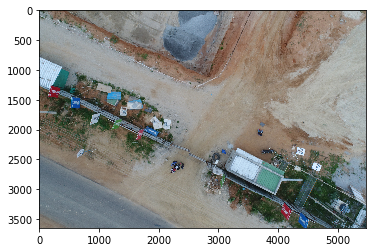

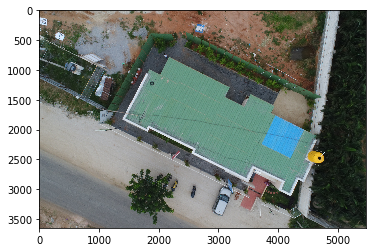

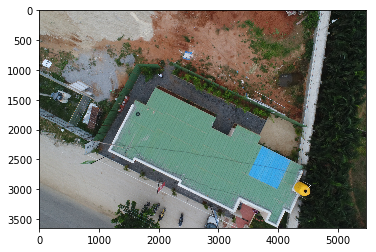

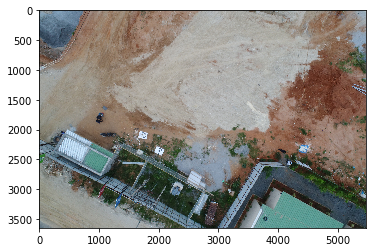

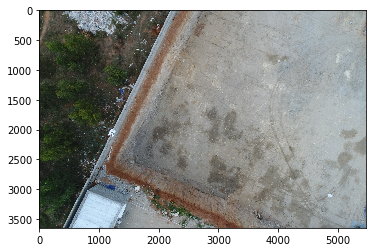

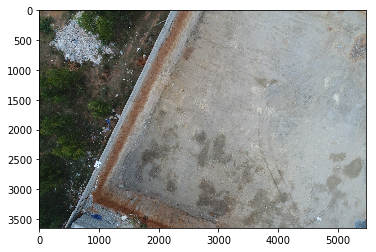

In [8]:
for i in range(len(images)):
    plt.imshow(images[i].image)
    plt.show()

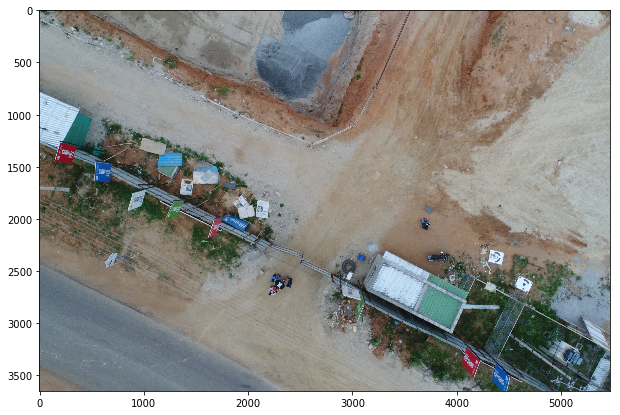

In [9]:
plotImageLarge(images[0].image)

In [10]:
# Setup SimpleBlobDetector parameters.
centerblob_params = cv2.SimpleBlobDetector_Params()

# Change thresholds
centerblob_params.minThreshold = 200
centerblob_params.maxThreshold = 255

# Filter by Area.
centerblob_params.filterByArea = True
centerblob_params.minArea = 80

# Filter by Circularity
centerblob_params.filterByCircularity = True
centerblob_params.minCircularity = 0.85

# Filter by Convexity
centerblob_params.filterByConvexity = True
centerblob_params.minConvexity = 0.87

# Filter by Inertia
centerblob_params.filterByInertia = True
centerblob_params.minInertiaRatio = 0.5

# Create a detector with the parameters
center_blob_detector = cv2.SimpleBlobDetector_create(centerblob_params)

# Setup SimpleBlobDetector parameters.
otherblobs_params = cv2.SimpleBlobDetector_Params()

# Change thresholds
otherblobs_params.minThreshold = 150
otherblobs_params.maxThreshold = 255

# Filter by Area.
otherblobs_params.filterByArea = True
otherblobs_params.minArea = 80

# Filter by Circularity
otherblobs_params.filterByCircularity = True
otherblobs_params.minCircularity = 0.1

# Filter by Convexity
otherblobs_params.filterByConvexity = True
otherblobs_params.minConvexity = 0.3

# Filter by Inertia
otherblobs_params.filterByInertia = False
otherblobs_params.minInertiaRatio = 0.01

# Create a detector with the parameters
otherblobs_detector = cv2.SimpleBlobDetector_create(otherblobs_params)

def circle_based_marker_detector(input_image):
    # Detect blobs.
    keypoints = center_blob_detector.detect(input_image)
    shifted_keypoints = []
#     for kp in keypoints:
#         print(kp.pt, kp.angle, kp.size)

    crops = []
    if len(keypoints) > 0:
        # Draw detected blobs as red circles.
        # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
        # the size of the circle corresponds to the size of blob

        im_with_keypoints = cv2.drawKeypoints(input_image, keypoints, np.array([]), (0, 255, 0),
                                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        for kp in keypoints:
            imsize = im_with_keypoints.shape
            center = (round(kp.pt[0]), round(kp.pt[1]))
            stretch = round(kp.size * 4)
            w = center[0]-stretch
            n = center[1]-stretch
            if center[0]-stretch < 0:
                w = 0
            if center[1]-stretch < 0:
                n = 0
            e = center[0]+stretch
            s = center[1]+stretch
            if center[0]+stretch < 0:
                e = 0
            if center[1]+stretch < 0:
                s = 0
            nw = (w, n)
            se = (e, s)
            cv2.circle(im_with_keypoints, center, 100, (255, 0, 0), 5)
            cv2.circle(im_with_keypoints, center, 2, (255, 255, 0), 1)
            cv2.rectangle(im_with_keypoints, nw, se, (0, 0, 255), 5)
#             print(nw, se)
            crop = input_image[nw[1]:se[1], nw[0]:se[0]]
            crops.append(crop)
            skp = center_blob_detector.detect(crop)
            for sk in skp:
#                 print(sk.pt, sk.size)
                shifted_keypoints.append(sk)
    return keypoints, shifted_keypoints, crops


def otherblobs_marker_detector(input_image):
    # Detect blobs.
    keypoints = otherblobs_detector.detect(input_image)

#     for kp in keypoints:
#         print(kp.pt, kp.angle, kp.size)

    if len(keypoints) > 0:
        # Draw detected blobs as red circles.
        # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
        # the size of the circle corresponds to the size of blob

        im_with_keypoints = cv2.drawKeypoints(input_image, keypoints, np.array([]), (0, 255, 0),
                                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        for kp in keypoints:
            imsize = im_with_keypoints.shape
            center = (round(kp.pt[0]), round(kp.pt[1]))
            cv2.circle(im_with_keypoints, center, 2, (255, 0, 0), 1)

        plt.imshow(im_with_keypoints)
        plt.show()
    return keypoints

<KeyPoint 0x7f0c4c7dfc90> <KeyPoint 0x7f0c4c7dfcf0>


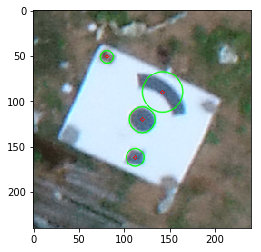

<KeyPoint 0x7f0c52260c90> <KeyPoint 0x7f0c52260ea0>


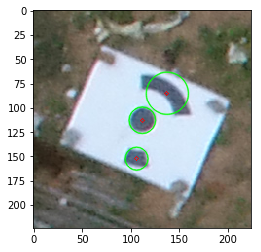

<KeyPoint 0x7f0c52260f90> <KeyPoint 0x7f0c52260db0>


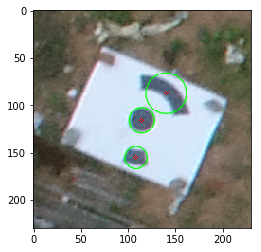

<KeyPoint 0x7f0c4c7dfe70> <KeyPoint 0x7f0c52260fc0>


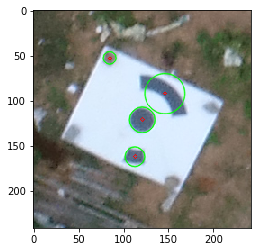

<KeyPoint 0x7f0c5228e1b0> <KeyPoint 0x7f0c5228e1e0>


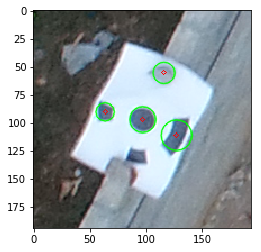

<KeyPoint 0x7f0c5228e090> <KeyPoint 0x7f0c5228e210>


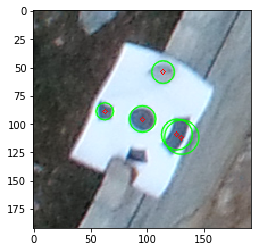

In [11]:
for i in range(len(images)):
    image_centerkp, markerkp, crops = circle_based_marker_detector(images[i].image)   
    images[i].kps = {}
    for j in range(len(crops)):
        print(markerkp[j], image_centerkp[j])
        images[i].centerkp.append(markerkp[j])
        images[i].image_centerkp.append(image_centerkp[j])
        images[i].kps[j] = otherblobs_marker_detector(crops[j])


In [12]:
for x in range(len(images)):
    print('#', x, 'has', len(images[x].centerkp), ' markers')
    for i in range(len(images[x].centerkp)):
        center = images[x].centerkp[i]
        center_blob = MarkerBlob(center.size, center.pt)
        blob_config = MarkerBlobConfig(center_blob, images[x].image_centerkp[i])
        print('\nImage ' + str(x) + ' marker ' + str(i) + ', center is at ', 
              center.pt, ' size is ', round(center.size))
        outer_blob_dist_range = [round(1.2 * center.size), round(1.5 * center.size)]
        for kp in images[x].kps[i]:
            dist = cv2.norm(center.pt, kp.pt)
            slope = (center.pt[1] - kp.pt[1])/(center.pt[0] - kp.pt[0])
            size = kp.size
            if round(dist) <= 2:
                pass
            elif round(dist) >= outer_blob_dist_range[0] and round(dist) <= outer_blob_dist_range[1]:
                outer_blob = MarkerBlob(size, kp.pt, dist, slope)
                blob_config.addOuter(outer_blob)
            else:
                outer_blob = MarkerBlob(size, kp.pt, dist)
                blob_config.addReject(outer_blob)
        blob_config.outers = sorted(blob_config.outers, key=lambda x: x.slope)
        print(blob_config)
        images[x].markerBlobs.append(blob_config)


# 0 has 1  markers

Image 0 marker 0, center is at  (119.74517059326172, 120.24686431884766)  size is  30
ID = None, 
Size = 29.97629737854004, Point = (119.74517059326172, 120.24686431884766), Norm Size = 1, Distance from Center = 0, Slope = 0, Angle From Previous Blob = 0, <KeyPoint 0x7f0c4c7dfcf0>, 
Outers =  
Size = 19.654165267944336, Point = (111.97639465332031, 161.7425079345703), Norm Size = 1, Distance from Center = 42.21661188072862, Slope = -5.341336130236706, Angle From Previous Blob = 0 
Size = 44.35828399658203, Point = (142.15228271484375, 89.64972686767578), Norm Size = 1, Distance from Center = 37.92444454220856, Slope = -1.3655100793511625, Angle From Previous Blob = 0
Rejects =  
Size = 14.374903678894043, Point = (80.9622573852539, 51.01846694946289), Norm Size = 1, Distance from Center = 79.35165631058564, Slope = 0, Angle From Previous Blob = 0
# 1 has 1  markers

Image 1 marker 0, center is at  (112.25983428955078, 112.40601348876953)  size is  28
ID = None, 
Siz

In [13]:
images

In [14]:
import math
def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]
def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    # Get angle in radians and then convert to degrees
    if magA == magB:
        return 0
    print(dot_prod, magB, magA)
    angle = math.acos(dot_prod/magB/magA)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360

    if ang_deg-180>=0:
        # As in if statement
        return 360 - ang_deg
    else: 

        return ang_deg


In [15]:
#size, pt, dist_from_center=0, slope=0, norm_size=1, angle_from_prev=0
def normalize_blob_sizes(markerConfigs):
    newMarkerConfigs = []
    for mconfig in markerConfigs:
        new_config = MarkerBlobConfig(mconfig.center, mconfig.center_image_kp)
        center_size = mconfig.center.size
        center_pt = mconfig.center.pt
        prev_slope = mconfig.outers[len(mconfig.outers)-1].slope
        prev_pt = mconfig.outers[len(mconfig.outers)-1].pt
        for o in mconfig.outers:
            angle_from_prev = ang([center_pt, prev_pt], [center_pt, o.pt])
            newBlob = MarkerBlob(round(o.size), (round(o.pt[0]), round(o.pt[1])), round(o.dist_from_center), 
                                 round(o.slope), round(10.0 * o.size/(center_size)), round(angle_from_prev/10.0))
            new_config.addOuter(newBlob)
            prev_slope = o.slope
            prev_pt = o.pt
        new_config.outers = sorted(new_config.outers, key=lambda x: x.angle_from_prev)
        print (new_config)
        newMarkerConfigs.append(new_config)
    return newMarkerConfigs

for x in range(len(images)):
    print('IMAGE ', x)
    normMarkerBlobs = normalize_blob_sizes(images[x].markerBlobs)
    images[x].markerBlobs = normMarkerBlobs

IMAGE  0
-1443.7237448688247 42.21661188072862 37.92444454220856
-1443.7237448688247 37.92444454220856 42.21661188072862
ID = None, 
Size = 29.97629737854004, Point = (119.74517059326172, 120.24686431884766), Norm Size = 1, Distance from Center = 0, Slope = 0, Angle From Previous Blob = 0, <KeyPoint 0x7f0c4c7dfcf0>, 
Outers =  
Size = 20, Point = (112, 162), Norm Size = 7, Distance from Center = 42, Slope = -5, Angle From Previous Blob = 15 
Size = 44, Point = (142, 90), Norm Size = 15, Distance from Center = 38, Slope = -1, Angle From Previous Blob = 15
Rejects = 
IMAGE  1
-1236.9088097696658 40.290170355059686 36.987405693660655
-1236.9088097696658 36.987405693660655 40.290170355059686
ID = None, 
Size = 27.935815811157227, Point = (112.25983428955078, 112.40601348876953), Norm Size = 1, Distance from Center = 0, Slope = 0, Angle From Previous Blob = 0, <KeyPoint 0x7f0c52260ea0>, 
Outers =  
Size = 23, Point = (106, 152), Norm Size = 8, Distance from Center = 40, Slope = -6, Angle Fr

In [16]:
knownMarkerBlobs = {}
numMarkers = 0
for x in range(len(images)):
    print('IMAGE', x)
    for i in range(len(images[x].markerBlobs)):
        print('MARKER', i)
        marker = images[x].markerBlobs[i]
        found = False
        for k, val in knownMarkerBlobs.items():
            v = val[1]
            if len(v.outers) == len(marker.outers):
                print('potential match')
                markerMatch = True
                for l in range(len(marker.outers)):
                    mblob = marker.outers[l]
                    blobMatch = False
                    for m in range(len(v.outers)):
                        vblob = v.outers[m]
                        if abs(vblob.angle_from_prev - mblob.angle_from_prev) < 2 and abs(vblob.norm_size - mblob.norm_size) < 2:
                            print('blobmatch')
                            blobMatch = True
                    if not blobMatch:
                        markerMatch = False
                        break
                if markerMatch:
                    print('marker match with id ', v.id)
                    print(v)
                    print(marker)
                    marker.id = v.id
                    found = True
                    knownMarkerBlobs[k][2] += 1
        if not found:
            knownMarkerBlobs[numMarkers] = [images[x], marker, 1]
            marker.id = numMarkers
            numMarkers += 1
            

IMAGE 0
MARKER 0
IMAGE 1
MARKER 0
potential match
blobmatch
blobmatch
marker match with id  0
ID = 0, 
Size = 29.97629737854004, Point = (119.74517059326172, 120.24686431884766), Norm Size = 1, Distance from Center = 0, Slope = 0, Angle From Previous Blob = 0, <KeyPoint 0x7f0c4c7dfcf0>, 
Outers =  
Size = 20, Point = (112, 162), Norm Size = 7, Distance from Center = 42, Slope = -5, Angle From Previous Blob = 15 
Size = 44, Point = (142, 90), Norm Size = 15, Distance from Center = 38, Slope = -1, Angle From Previous Blob = 15
Rejects = 
ID = None, 
Size = 27.935815811157227, Point = (112.25983428955078, 112.40601348876953), Norm Size = 1, Distance from Center = 0, Slope = 0, Angle From Previous Blob = 0, <KeyPoint 0x7f0c52260ea0>, 
Outers =  
Size = 23, Point = (106, 152), Norm Size = 8, Distance from Center = 40, Slope = -6, Angle From Previous Blob = 15 
Size = 43, Point = (137, 85), Norm Size = 15, Distance from Center = 37, Slope = -1, Angle From Previous Blob = 15
Rejects = 
IMAGE 

In [17]:
knownMarkerBlobs

{0: [<__main__.ImageMarkerConfig at 0x7f0c52271438>,
  4],
 1: [<__main__.ImageMarkerConfig at 0x7f0c1aafc278>,
  2]}

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
for r, z in knownMarkerBlobs.items():
    print(z[1])
    center = (round(z[1].center_image_kp.pt[0]), round(z[1].center_image_kp.pt[1]))
#     im_with_keypoints = cv2.drawKeypoints(z[0].image, z[1].center_image_kp, np.array([]), (0, 255, 0),
#                                       cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    im_with_keypoints = cv2.circle(z[0].image, center, 100, (255, 0, 0), 5)
    
    cv2.putText(im_with_keypoints, str(r), center, font, 4,(0,255,255),5,cv2.LINE_AA)
    plotImageLarge(im_with_keypoints)
    plt.show()


ID = 0, 
Size = 29.97629737854004, Point = (119.74517059326172, 120.24686431884766), Norm Size = 1, Distance from Center = 0, Slope = 0, Angle From Previous Blob = 0, <KeyPoint 0x7f0c4c7dfcf0>, 
Outers =  
Size = 20, Point = (112, 162), Norm Size = 7, Distance from Center = 42, Slope = -5, Angle From Previous Blob = 15 
Size = 44, Point = (142, 90), Norm Size = 15, Distance from Center = 38, Slope = -1, Angle From Previous Blob = 15
Rejects = 
